<a href="https://colab.research.google.com/github/elaineortsac3/projetos/blob/master/Matriz_de_Confus%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Matriz de confusão

In [24]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

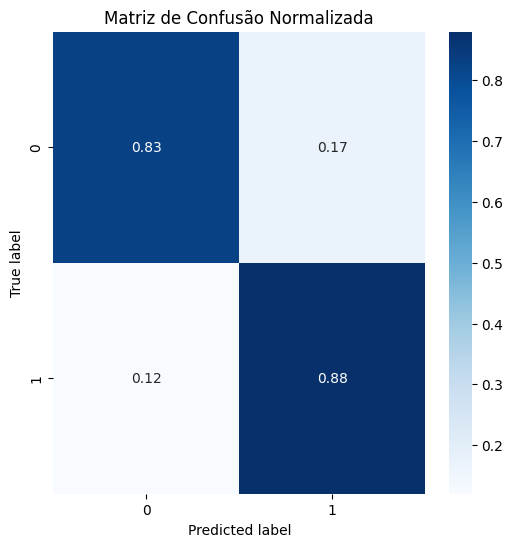

In [25]:
#Simulação binária
y_true = [0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1]
classes = [0, 1]

#Matriz de Confusão (simulação)
con_mat = tf.math.confusion_matrix(labels=y_true, predictions=y_pred).numpy()
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm, index=classes, columns=classes)

#Gráfico
plt.figure(figsize=(6, 6))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.Blues)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title("Matriz de Confusão Normalizada")
plt.show()


###Calculo de Metricas

In [26]:
def calcular_metricas(VP, VN, FP, FN):
  total = VP + VN + FP + FN
  acuracia = (VP + VN) / total
  precisao = VP / (VP + FP) if (VP + FP) != 0 else 0
  recall = VP / (VP + FN) if (VP + FN) != 0 else 0
  especificidade = VN / (VN + FP) if (VN + FP) != 0 else 0
  f1_score = (2 * precisao * recall) / (precisao + recall) if (precisao + recall) != 0 else 0

  print(f'Acurácia: {acuracia:.2f}')
  print(f'Precisão: {precisao:.2f}')
  print(f'Sensibilidade (Recall): {recall:.2f}')
  print(f'Especificidade: {especificidade:.2f}')
  print(f'F1-Score: {f1_score:.2f}')

#Extração elementos da matriz
VN = con_mat[0][0]
FP = con_mat[0][1]
FN = con_mat[1][0]
VP = con_mat[1][1]

calcular_metricas(VP, VN, FP, FN)


Acurácia: 0.86
Precisão: 0.88
Sensibilidade (Recall): 0.88
Especificidade: 0.83
F1-Score: 0.88
